
# OPTIMIZER




## BASIC OPTIMIZER

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


X_b = np.c_[np.ones((100, 1)), X]


## STOCHASTIC GD

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate=0.1, n_epochs = 1000):
  m = len(y)
  theta = np.random.randn(2, 1) # random initialization
  print("Initial Theta:", theta)
  for epoch in range(n_epochs):
    for i in range(m):
      randomm_index = np.random.randint(m)
      xi = X[randomm_index:randomm_index+1]
      yi = y[randomm_index:randomm_index+1]
      gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - learning_rate * gradient
  return theta

theta_sgd = stochastic_gradient_descent(X_b, y)
print("SGD Theta:", theta_sgd)

Initial Theta: [[0.01300189]
 [1.45353408]]
SGD Theta: [[4.24038078]
 [3.34658244]]


## BATCH GD

In [ ]:
def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations = 1000):
  m = len(y)
  theta = np.random.randn(2, 1) # random initialization
  print("Initial Theta:", theta)
  for iteration in range(n_iterations):
    gradient = 2/m * X.T.dot(X.dot(theta) - y)
    theta = theta - learning_rate * gradient
  return theta


theta_bgd = batch_gradient_descent(X_b, y)
print("BGD Theta:", theta_bgd)

Initial Theta: [[-1.17562577]
 [-0.84879539]]
BGD Theta: [[4.21509616]
 [2.77011339]]


## MINI-BATCH GD

In [ ]:
def mini_batch_gradient_descent(X, y, learning_rate=0.1, n_iterations = 1000, batch_size = 20):
  m = len(y)
  theta = np.random.randn(2, 1) # random initialization
  print("Initial Theta:", theta)
  for iteration in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
      xi = X_b_shuffled[i:i+batch_size]
      yi = y_shuffled[i:i+batch_size]
      gradient = 2/len(xi) * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - learning_rate * gradient
  return theta

theta_mbgd = mini_batch_gradient_descent(X_b, y)
print("MBGD Theta:", theta_mbgd)

Initial Theta: [[0.077042  ]
 [0.32159946]]
MBGD Theta: [[4.20311044]
 [2.75757629]]


[[0]
 [2]]


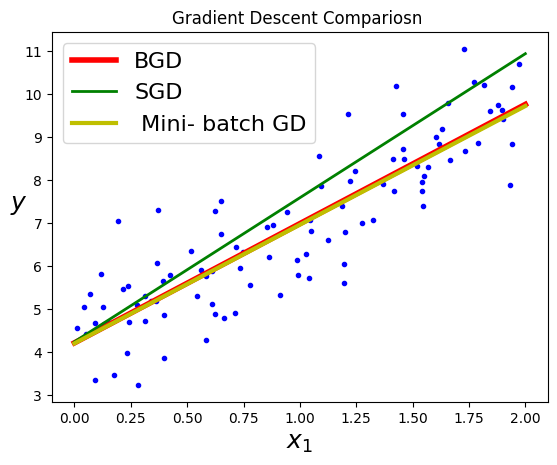

In [ ]:
def plot_gradient_descent( X, y, theta_sgd, theta_bgd, theta_mbgd):
  plt.plot(X, y, "b.")
  X_new = np.array([[0], [2]])
  X_new_b = np.c_[np.ones((2, 1)), X_new]
  print(X_new)
  y_predict_bgd = X_new_b.dot(theta_bgd)
  y_predict_sgd = X_new_b.dot(theta_sgd)
  y_predict_mbgd = X_new_b.dot(theta_mbgd)
  plt.plot(X_new, y_predict_bgd, "r-", linewidth = 4, label="BGD")
  plt.plot(X_new, y_predict_sgd, "g-", linewidth = 2, label="SGD")
  plt.plot(X_new, y_predict_mbgd, "y-", linewidth = 3, label=" Mini- batch GD")
  plt.xlabel("$x_1$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  plt.legend(loc="upper left", fontsize=16)
  plt.title("Gradient Descent Compariosn ")
  plt.show()
plot_gradient_descent(X, y, theta_sgd, theta_bgd, theta_mbgd)

## AdvaAdvancence optimizeroptimizer
optimizeroptimiz

## Momentum based GD

In [ ]:
import numpy as np

X = np.random.rand(100, 2)
y = np.random.randn(100, 1)
theta = np.random.randn(2,1)

def gradient_descent_with_momentum(X, y, theta, learning_rate, gamma, n_iterations):
    m = len(y)
    velocity = np.zeros_like(theta)

    print("Initial Theta:", theta)

    for i in range(n_iterations):
        gradient = 1/m * X.T.dot(X.dot(theta) - y)
        velocity = gamma * velocity + learning_rate * gradient
        theta = theta - velocity
    return theta

learning_rate = 0.01
gamma = 0.9
n_iterations = 1000
theta = gradient_descent_with_momentum(X, y, theta, learning_rate, gamma, n_iterations)
print("Momentum Theta:", theta)



Initial Theta: [[0.90517057]
 [1.41789787]]
Momentum Theta: [[0.01316148]
 [0.00294489]]


## Adagrad GD

In [ ]:
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1)
y = np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
learning_rate = 0.01
epsilon  = 1e-8
n_iterations = 1000

theta = np.random.randn(2,1)
gradient_accum = np.zeros((2,1))

for i in range(n_iterations):
        gradient = 2/len(X_b) * X_b.T.dot(X_b.dot(theta) - y)
        gradient_accum += gradient**2
        adjusted_gradient = gradient / (np.sqrt(gradient_accum) + epsilon)
        theta -= learning_rate * adjusted_gradient

print("Adagard Theta:", theta)

Adagard Theta: [[-0.3938753 ]
 [ 0.96052359]]


## RMSprop

In [ ]:
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1)
y = np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
learning_rate = 0.01
epsilon  = 1e-8
decay_rate = 0.9
n_iterations = 1000

theta = np.random.randn(2,1)
gradient_accum = np.zeros((2,1))

for i in range(n_iterations):
        gradient = 2/len(X_b) * X_b.T.dot(X_b.dot(theta) - y)
        gradient_accum = decay_rate * gradient_accum + (1 - decay_rate) * gradient**2
        adjusted_gradient = gradient / (np.sqrt(gradient_accum) + epsilon)
        theta -= learning_rate * adjusted_gradient

print("RMSprop Theta:", theta)

RMSprop Theta: [[ 0.21009616]
 [-0.46477322]]


In [1]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
X = np.random.rand(100, 1)
y = np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

# Hyperparameters for Adam optimizer
learning_rate = 0.01
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.999
n_iterations = 1000

# Initialize parameters
theta = np.random.randn(2, 1)
m = np.zeros((2, 1))  # First moment vector
v = np.zeros((2, 1))  # Second moment vector

# Adam optimization loop
for i in range(1, n_iterations + 1):
    # Compute gradient
    gradient = 2 / len(X_b) * X_b.T.dot(X_b.dot(theta) - y)

    # Update biased first moment estimate
    m = beta1 * m + (1 - beta1) * gradient

    # Update biased second raw moment estimate
    v = beta2 * v + (1 - beta2) * gradient**2

    # Correct bias in first and second moment estimates
    m_hat = m / (1 - beta1**i)
    v_hat = v / (1 - beta2**i)

    # Update parameters
    theta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

# Display the result
print("Adam Optimizer Theta:", theta)


Adam Optimizer Theta: [[ 0.21426724]
 [-0.45814422]]


In [2]:
import numpy as np

np.random.seed(42)
X = np.random.rand(100, 1)
y = np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

theta = np.random.randn(2, 1)
m, v = np.zeros((2, 1)), np.zeros((2, 1))
lr, eps, b1, b2 = 0.01, 1e-8, 0.9, 0.999

for i in range(1, 1001):
    grad = 2 / len(X_b) * X_b.T @ (X_b @ theta - y)
    m, v = b1 * m + (1 - b1) * grad, b2 * v + (1 - b2) * grad**2
    m_hat, v_hat = m / (1 - b1**i), v / (1 - b2**i)
    theta -= lr * m_hat / (np.sqrt(v_hat) + eps)

print("Theta:", theta)


Theta: [[ 0.21426724]
 [-0.45814422]]
